In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import glob
import os

In [2]:
#Combining all datasets for 
path = r'../Data/Raw Data/Natural Disaster Data'
all_files = glob.glob(path + "/*.csv")

li = []

for filename in all_files:
    df = pd.read_csv(filename, index_col=None, header=0)
    li.append(df)

#Create a dataframe based on multiple csvs
natural_disasters_df = pd.concat(li, axis=0, ignore_index=True)
natural_disasters_df.head()

C:\Users\Ty\anaconda3\envs\PythonData\lib\site-packages\IPython\core\interactiveshell.py:3072: DtypeWarning: Columns (26,28) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
C:\Users\Ty\anaconda3\envs\PythonData\lib\site-packages\IPython\core\interactiveshell.py:3072: DtypeWarning: Columns (28) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
C:\Users\Ty\anaconda3\envs\PythonData\lib\site-packages\IPython\core\interactiveshell.py:3072: DtypeWarning: Columns (29,34,35,37) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,BEGIN_YEARMONTH,BEGIN_DAY,BEGIN_TIME,END_YEARMONTH,END_DAY,END_TIME,EPISODE_ID,EVENT_ID,STATE,STATE_FIPS,...,END_RANGE,END_AZIMUTH,END_LOCATION,BEGIN_LAT,BEGIN_LON,END_LAT,END_LON,EPISODE_NARRATIVE,EVENT_NARRATIVE,DATA_SOURCE
0,195004,28,1445,195004,28,1445,NaN,10096222,OKLAHOMA,40.0,...,0.0,NaN,NaN,35.12,-99.20,35.17,-99.20,NaN,NaN,PUB
1,195004,29,1530,195004,29,1530,NaN,10120412,TEXAS,48.0,...,0.0,NaN,NaN,31.90,-98.60,31.73,-98.60,NaN,NaN,PUB
2,195007,5,1800,195007,5,1800,NaN,10104927,PENNSYLVANIA,42.0,...,0.0,NaN,NaN,40.58,-75.70,40.65,-75.47,NaN,NaN,PUB
3,195007,5,1830,195007,5,1830,NaN,10104928,PENNSYLVANIA,42.0,...,0.0,NaN,NaN,40.60,-76.75,NaN,NaN,NaN,NaN,PUB
4,195007,24,1440,195007,24,1440,NaN,10104929,PENNSYLVANIA,42.0,...,0.0,NaN,NaN,41.63,-79.68,NaN,NaN,NaN,NaN,PUB


In [3]:
#Cleaning the Dataframe created above
natural_disasters_df = natural_disasters_df.drop(columns =['BEGIN_YEARMONTH', 'BEGIN_DAY', 'BEGIN_TIME', 'END_YEARMONTH', 'END_DAY','END_TIME','EPISODE_ID','STATE_FIPS','CZ_TYPE','CZ_FIPS','CZ_NAME','WFO','BEGIN_DATE_TIME','CZ_TIMEZONE','END_DATE_TIME','SOURCE','MAGNITUDE_TYPE','FLOOD_CAUSE','CATEGORY','TOR_F_SCALE','TOR_LENGTH','TOR_WIDTH','TOR_OTHER_WFO','TOR_OTHER_CZ_STATE','TOR_OTHER_CZ_FIPS','TOR_OTHER_CZ_NAME','BEGIN_RANGE','BEGIN_AZIMUTH','BEGIN_LOCATION','END_RANGE','END_AZIMUTH','END_LOCATION','BEGIN_LAT','BEGIN_LON','END_LAT','END_LON','EPISODE_NARRATIVE','EVENT_NARRATIVE'])
natural_disasters_df.head()

,EVENT_ID,STATE,YEAR,MONTH_NAME,EVENT_TYPE,INJURIES_DIRECT,INJURIES_INDIRECT,DEATHS_DIRECT,DEATHS_INDIRECT,DAMAGE_PROPERTY,DAMAGE_CROPS,MAGNITUDE,DATA_SOURCE
0,10096222,OKLAHOMA,1950,April,Tornado,0,0,0,0,250K,0,0.0,PUB
1,10120412,TEXAS,1950,April,Tornado,0,0,0,0,25K,0,0.0,PUB
2,10104927,PENNSYLVANIA,1950,July,Tornado,2,0,0,0,25K,0,0.0,PUB
3,10104928,PENNSYLVANIA,1950,July,Tornado,0,0,0,0,2.5K,0,0.0,PUB
4,10104929,PENNSYLVANIA,1950,July,Tornado,0,0,0,0,2.5K,0,0.0,PUB


In [4]:
# Check to see if there are any rows with missing data
natural_disasters_df['DAMAGE_CROPS'] = natural_disasters_df['DAMAGE_CROPS'].fillna(0)
natural_disasters_df['DAMAGE_PROPERTY'] = natural_disasters_df['DAMAGE_PROPERTY'].fillna(0)

In [5]:
#This cleans the financial impact data and allows us to preform calculations

#Take the K M B identifiers off of DAMAGE_PROPERTY
natural_disasters_df["property_money_identifier"] = natural_disasters_df.DAMAGE_PROPERTY.str.extract(r'[\d\.]+([KkMBHhT]+)', expand=False)
natural_disasters_df['DAMAGE_PROPERTY'] = natural_disasters_df['DAMAGE_PROPERTY'].str.replace(r'[KkMBHhT?]+$','', regex=True)

#Take the K M B identifiers off of DAMAGE_CROPS
natural_disasters_df['crops_money_identifier'] = natural_disasters_df.DAMAGE_CROPS.str.extract(r'[\d\.]+([KkMBHhT]+)', expand=False)
natural_disasters_df['DAMAGE_CROPS'] = natural_disasters_df['DAMAGE_CROPS'].str.replace(r'[KkMBHh?T]+$','', regex=True)

#Replace K M and B with values in money_identifier with the values in the property_money_identifier column
natural_disasters_df['property_money_identifier'] = natural_disasters_df['property_money_identifier'].str.replace(r'[Kk]+$','1000', regex=True)
natural_disasters_df['property_money_identifier'] = natural_disasters_df['property_money_identifier'].str.replace(r'[M]+$','1000000', regex=True)
natural_disasters_df['property_money_identifier'] = natural_disasters_df['property_money_identifier'].str.replace(r'[B]+$','1000000000', regex=True)
natural_disasters_df['property_money_identifier'] = natural_disasters_df['property_money_identifier'].str.replace(r'[T]+$','1000000000000', regex=True)
natural_disasters_df['property_money_identifier'] = natural_disasters_df['property_money_identifier'].str.replace(r'[hH?]+$','1', regex=True)
natural_disasters_df['property_money_identifier'] = natural_disasters_df['property_money_identifier'].fillna(1)

#Replace K M and B with values in money_identifier with the values in the property_money_identifier column
natural_disasters_df['crops_money_identifier'] = natural_disasters_df['crops_money_identifier'].str.replace(r'[Kk]+$','1000', regex=True)
natural_disasters_df['crops_money_identifier'] = natural_disasters_df['crops_money_identifier'].str.replace(r'[M]+$','1000000', regex=True)
natural_disasters_df['crops_money_identifier'] = natural_disasters_df['crops_money_identifier'].str.replace(r'[B]+$','1000000000', regex=True)
natural_disasters_df['crops_money_identifier'] = natural_disasters_df['crops_money_identifier'].str.replace(r'[T]+$','1000000000000', regex=True)
natural_disasters_df['crops_money_identifier'] = natural_disasters_df['crops_money_identifier'].str.replace(r'[hH?]+$','1', regex=True)
natural_disasters_df['crops_money_identifier'] = natural_disasters_df['crops_money_identifier'].fillna(1)

In [6]:
# Replace any '' with a zero
natural_disasters_df['DAMAGE_CROPS'] = natural_disasters_df['DAMAGE_CROPS'].fillna(0)
natural_disasters_df['DAMAGE_PROPERTY'] = natural_disasters_df['DAMAGE_PROPERTY'].fillna(0)

# Convert DAMAGE_PROPERTY & DAMAGE_CROPS
natural_disasters_df['DAMAGE_PROPERTY'] = pd.to_numeric(natural_disasters_df['DAMAGE_PROPERTY'])
natural_disasters_df['DAMAGE_CROPS'] = pd.to_numeric(natural_disasters_df['DAMAGE_CROPS'])
natural_disasters_df['crops_money_identifier'] = pd.to_numeric(natural_disasters_df['crops_money_identifier'])
natural_disasters_df['property_money_identifier'] = pd.to_numeric(natural_disasters_df['property_money_identifier'])

# Multiply 'DAMAGE_PROPERTY' by 'property_money_identifier' & multiply 'DAMAGE_CROPS' by 'crops_money_identifier'
natural_disasters_df['DAMAGE_PROPERTY'] = natural_disasters_df['DAMAGE_PROPERTY'] * natural_disasters_df['property_money_identifier']
natural_disasters_df['DAMAGE_CROPS'] = natural_disasters_df['DAMAGE_CROPS'] * natural_disasters_df['crops_money_identifier']

In [7]:
#Drop rows that have no monetary value for "DAMAGE_PROPERTY" or "DAMAGE_CROPS"
natural_disasters_df = natural_disasters_df.loc[(natural_disasters_df['DAMAGE_PROPERTY'] !=0) | (natural_disasters_df['DAMAGE_CROPS'] !=0)]
natural_disasters_df.head()

,EVENT_ID,STATE,YEAR,MONTH_NAME,EVENT_TYPE,INJURIES_DIRECT,INJURIES_INDIRECT,DEATHS_DIRECT,DEATHS_INDIRECT,DAMAGE_PROPERTY,DAMAGE_CROPS,MAGNITUDE,DATA_SOURCE,property_money_identifier,crops_money_identifier
0,10096222,OKLAHOMA,1950,April,Tornado,0,0,0,0,250000.0,0.0,0.0,PUB,1000,1
1,10120412,TEXAS,1950,April,Tornado,0,0,0,0,25000.0,0.0,0.0,PUB,1000,1
2,10104927,PENNSYLVANIA,1950,July,Tornado,2,0,0,0,25000.0,0.0,0.0,PUB,1000,1
3,10104928,PENNSYLVANIA,1950,July,Tornado,0,0,0,0,2500.0,0.0,0.0,PUB,1000,1
4,10104929,PENNSYLVANIA,1950,July,Tornado,0,0,0,0,2500.0,0.0,0.0,PUB,1000,1


In [8]:
natural_disasters_df.to_csv("../Data/Cleaned data/natural_disasters.csv")

In [9]:
#This ends beds Project1-BS file

In [10]:
#This begins the JZwork file

In [11]:
data = '../Data/Cleaned data/natural_disasters.csv'
clean_df = pd.read_csv(data)
clean_df.head()

,Unnamed: 0,EVENT_ID,STATE,YEAR,MONTH_NAME,EVENT_TYPE,INJURIES_DIRECT,INJURIES_INDIRECT,DEATHS_DIRECT,DEATHS_INDIRECT,DAMAGE_PROPERTY,DAMAGE_CROPS,MAGNITUDE,DATA_SOURCE,property_money_identifier,crops_money_identifier
0,0,10096222,OKLAHOMA,1950,April,Tornado,0,0,0,0,250000.0,0.0,0.0,PUB,1000,1
1,1,10120412,TEXAS,1950,April,Tornado,0,0,0,0,25000.0,0.0,0.0,PUB,1000,1
2,2,10104927,PENNSYLVANIA,1950,July,Tornado,2,0,0,0,25000.0,0.0,0.0,PUB,1000,1
3,3,10104928,PENNSYLVANIA,1950,July,Tornado,0,0,0,0,2500.0,0.0,0.0,PUB,1000,1
4,4,10104929,PENNSYLVANIA,1950,July,Tornado,0,0,0,0,2500.0,0.0,0.0,PUB,1000,1


In [12]:
year_df = clean_df.groupby('YEAR')
#year_df.head()
year_events = year_df['EVENT_TYPE'].count()
year_ttl_dmg = year_df['DAMAGE_PROPERTY'].sum()
year_ttl_dmg

YEAR
1950    3.448165e+07
1951    6.550599e+07
1952    9.430224e+07
1953    5.961047e+08
1954    8.580532e+07
            ...     
2015    4.446679e+09
2016    1.821901e+10
2017    8.040249e+10
2018    2.990562e+10
2019    6.243334e+09
Name: DAMAGE_PROPERTY, Length: 70, dtype: float64

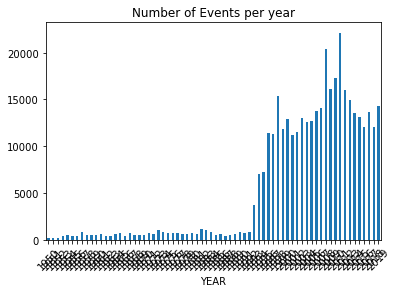

In [13]:
#This displays the number of Natural Disasters each year
event_chart = year_events.plot(kind='bar', title="Number of Events per year",)
plt.xticks(rotation=45)
plt.show()

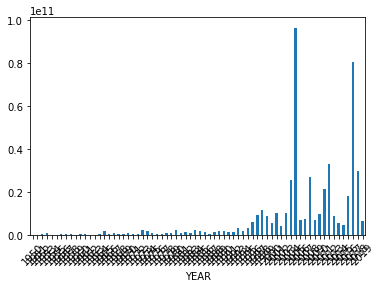

In [14]:
#This graph shows the amount of Natural disaster per category
ttl_dmg_chart = year_ttl_dmg.plot(kind='bar')
plt.xticks(rotation=45)


#Stack overflow infromation 
plt.gca().margins(x=0)
plt.gcf().canvas.draw()
tl = plt.gca().get_xticklabels()
maxsize = max([t.get_window_extent().width for t in tl])
#


plt.show()

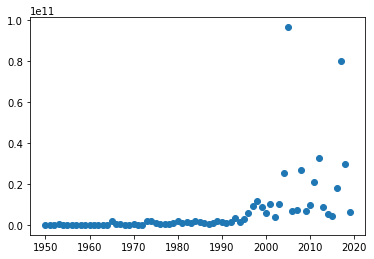

In [15]:
#This graph shows the damage created each year
y_axis = year_df['DAMAGE_PROPERTY'].sum()
x_axis = year_df['YEAR'].unique()
plt.scatter(x_axis,y_axis)
plt.show()

In [16]:
no_thunderstom_X = clean_df.replace({'THUNDERSTORM WINDS LIGHTNING':"Thunderstorm",'THUNDERSTORM WINDS/FLOODING':"Thunderstorm",'THUNDERSTORM WINDS/ FLOOD':"Thunderstorm",'Thunderstorm Wind':"Thunderstorm",'Marine Thunderstorm Wind':"Thunderstorm",'Lightning':"Thunderstorm",'Marine Hail': "Thunderstorm",'THUNDERSTORM WIND/ TREE ':"Thunderstorm"})
ttwh_df = clean_df.loc[clean_df['EVENT_TYPE'] == 'Tornado','Thunderstorm Wind','Hail']

IndexingError: Too many indexers

In [ ]:
array = ['Tornado','Thunderstorm','Hail']
ttwh_df = no_thunderstom_X.loc[no_thunderstom_X['EVENT_TYPE'].isin(array)]
ninety_six_df = no_thunderstom_X.loc[no_thunderstom_X['EVENT_TYPE'].isin(array) == False]
ttwh_df.head()

In [ ]:
years_df = ttwh_df.groupby('YEAR')
#year_df.head()
years_events = years_df['EVENT_TYPE'].count()
years_ttl_dmg = years_df['DAMAGE_PROPERTY'].sum()
years_ttl_dmg

In [ ]:
#This creates a data file for Cost per Incident
CPI = '../Data/Cleaned data/CPIdata1950-2020.csv'
CPI_df = pd.read_csv(CPI)
CPI_df.head()

In [ ]:
# This graphs damaged property each year
y_axis = years_df['DAMAGE_PROPERTY'].sum()
x_axis = ttwh_df['YEAR'].unique()
plt.scatter(x_axis,y_axis)
plt.show()

In [ ]:
ttwh_df['DAMAGE_PROPERTY'] =ttwh_df.apply(lambda x: cpi.inflate(x.DAMAGE_PROPERTY, x.YEAR), axis=1)
df.head()

In [ ]:
#This is the end of Jons JZwork file

In [ ]:
#This is the begging of the USemssions file

In [ ]:
emissions_data_path = "../Data/Raw Data/CO2Data.csv"
pop_data_path = "../Data/Raw Data/pop_data.csv"
emissions_df = pd.read_csv(emissions_data_path)
pop_df = pd.read_csv(pop_data_path)

In [ ]:
us_co2_series = emissions_df.loc[249]
us_co2_df = us_co2_series.to_frame()
us_clean_df = us_co2_df.drop(['Country Name', 'Country Code','Indicator Name','Indicator Code', '2017', '2018','2019'])
us_clean_df['Year'] = us_clean_df.index
us_em_df = us_clean_df.rename(columns={249:"Metric ton per Capita Emissions"})
us_em_df = us_em_df[['Year', 'Metric ton per Capita Emissions']]
us_em_df.head()

In [ ]:
us_emission_line = us_em_df.plot.line(legend=None)

In [ ]:
us_pop_line = pop_df.plot.line(x='Population by Millions', y='Year')

In [ ]:
merged_data = pop_df.merge(us_em_df)
merged_data.head()

In [ ]:
merged_data = merged_data.rename(columns={'Population by Millions':"pop", 'Metric ton per Capita Emissions':'emissions'})
merged_data.dtypes
merged_data['US Total Emmissions'] = merged_data['pop'] * merged_data['emissions']
merged_data.head()

In [ ]:
x = merged_data['Year']
y = merged_data['US Total Emmissions']
us_total_emissions_line = merged_data.plot.line(x='Year', y='US Total Emmissions')
plt.savefig("Images/UsEmissionsTrend.png")
plt.show()

In [ ]:
final_csv_location = "../Data/Cleaned data/Year_CO2_Pop_data.csv"
merged_data.to_csv(final_csv_location)

In [ ]:
#This completed the USemissions file

In [ ]:
#This begins the inflation file

In [ ]:
CPI = '../Data/Cleaned data/CPIdata1950-2020.csv'
CPI_df = pd.read_csv(CPI)
CPI_df.head()

In [ ]:
# create index multiplier
CPI_df['CPI_Multiplier'] = CPI_df['Annual'].iloc[-2] / CPI_df['Annual']

In [ ]:
clean_cpi = CPI_df.drop(['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec','Annual','HALF1','HALF2'], axis=1)

In [ ]:
clean_cpi = clean_cpi.drop(index=70)

In [ ]:
clean_cpi.to_csv('../Data/Cleaned data/clean_cpi.csv', index=False)

In [ ]:
#This completes the inflation file